## CSE 6367 Programming Assignment 4 (P4)
## Spring 2023
## Panorama

#### NOTE: This is an optional programming assignment. If you submit all 4 programming assignments, we will count your best 3 out of 4 programming assignments towards your final grade.

## Dataset

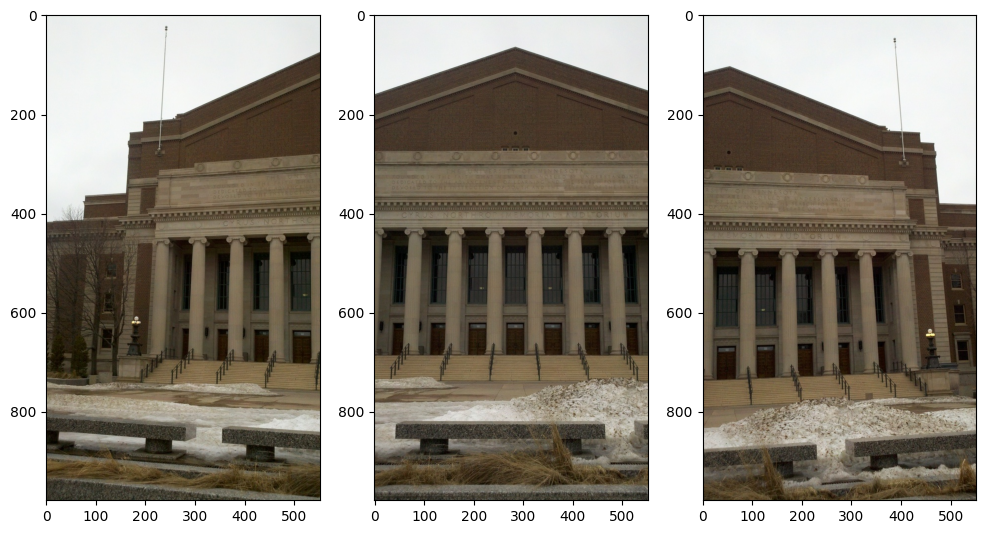

In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 12 ,8

# read images
img1 = cv2.imread("Images/mall1.jpg")
img2 = cv2.imread("Images/mall2.jpg")
img3 = cv2.imread("Images/mall3.jpg")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)

## Assignment Instructions:

In this assignment, you will perform image stitching and create a panorama of stitched images. Here are some basic steps you need to perform for image stiching:

    1. Detecting keypoints (DoG, Harris, etc.) and extracting local invariant descriptors (SIFT, SURF, ORB etc.) from two input images
    2. Matching the descriptors between the images
    3. Estimate a homography matrix using our matched feature vectors
    4. Applying a warping transformation using the homography matrix obtained from Step #3
    
<b> You may use opencv or other libraries for doing different tasks of this programming assignment.<\b>

Panorama saved as panorama.jpg


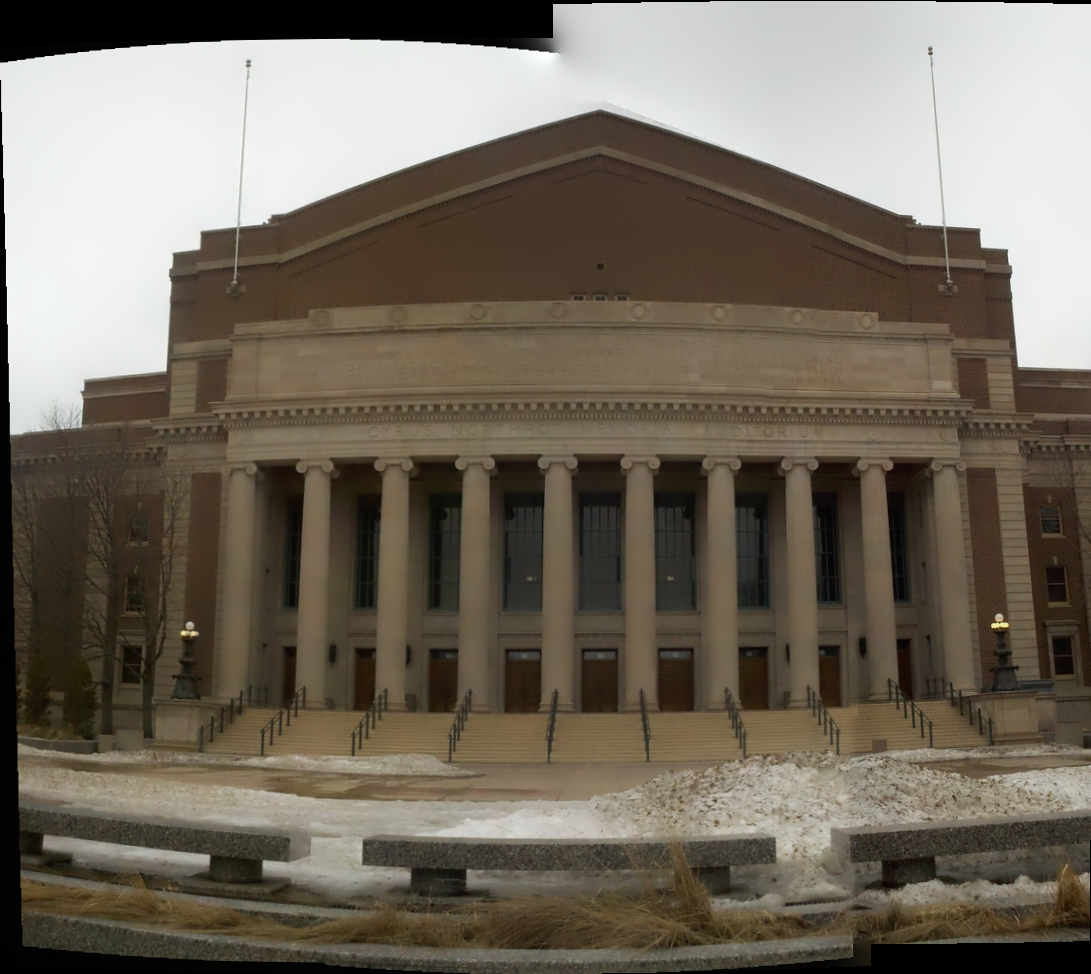

In [2]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def stitch_images(images, ratio=.75, reproj_thresh=4.):
    # Initialize the OpenCV image stitcher
    stitcher = cv2.Stitcher_create()

    # Initialize the panorama with the first image
    panorama = images[0]

    for i in range(1, len(images)):
        imageB = images[i]

        # Detect keypoints and extract local invariant descriptors
        detector = cv2.xfeatures2d.SIFT_create()
        keypointsA, descriptorsA = detector.detectAndCompute(panorama, None)
        keypointsB, descriptorsB = detector.detectAndCompute(imageB, None)

        # Match the descriptors between the images
        matcher = cv2.DescriptorMatcher_create("BruteForce")
        raw_matches = matcher.knnMatch(descriptorsA, descriptorsB, 2)
        matches = []

        for m, n in raw_matches:
            if m.distance < ratio * n.distance:
                matches.append((m, n))

        # Estimate a homography matrix
        if len(matches) > 4:
            pointsA = np.float32([keypointsA[m.queryIdx].pt for m, _ in matches])
            pointsB = np.float32([keypointsB[m.trainIdx].pt for _, m in matches])

            H, status = cv2.findHomography(pointsA, pointsB, cv2.RANSAC, reproj_thresh)

            # Apply a warping transformation using the homography matrix
            panorama = stitcher.stitch([panorama, imageB], H)[1]
        else:
            print(f"Failed to stitch image {i}"); break

    return panorama

if __name__ == "__main__":
    # Load images from the folder
    image_dir = "Images"
    image_files = sorted(os.path.join(image_dir, file_name) for file_name in os.listdir(image_dir))
    images = list(cv2.imread(image_path) for image_path in image_files)

    result = stitch_images(images)

    if result is not None:
        cv2.imwrite(pano_image:="panorama.jpg", result)
        print(f"Panorama saved as {pano_image}")
        cv2_imshow(result)
    else:
        print("Failed to stitch images")

### Submission Guidelines:
        
        Submit through Canvas your source code in a single .ipynb file. 
        The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)
        The images are available in the ./Images directory. Your TA will use the same directory name to grade your submission.
        You don't need to attach the images folder with your submission.